In [17]:
import pandas as pd
import numpy as np

#task 1
energy_df = pd.read_excel('En_In.xls', skiprows=17, skipfooter=38, usecols=[2, 3, 4, 5])
energy_df.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy_df

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650
...,...,...,...,...
222,Viet Nam,2554,28,45.321520
223,Wallis and Futuna Islands,0,26,0.000000
224,Yemen,344,13,0.000000
225,Zambia,400,26,99.714670


In [18]:
#task 2
energy_df['Energy Supply'].replace('...', np.NaN, inplace=True)
energy_df['Energy Supply'] *= 1000000
energy_df['Energy Supply']

0      3.210000e+08
1      1.020000e+08
2      1.959000e+09
3               NaN
4      9.000000e+06
           ...     
222    2.554000e+09
223    0.000000e+00
224    3.440000e+08
225    4.000000e+08
226    4.800000e+08
Name: Energy Supply, Length: 227, dtype: float64

In [19]:
#task 3
country_rename_dict = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
energy_df['Country'].replace(country_rename_dict, inplace=True)
energy_df

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10,78.669280
1,Albania,1.020000e+08,35,100.000000
2,Algeria,1.959000e+09,51,0.551010
3,American Samoa,NaN,...,0.641026
4,Andorra,9.000000e+06,121,88.695650
...,...,...,...,...
222,Viet Nam,2.554000e+09,28,45.321520
223,Wallis and Futuna Islands,0.000000e+00,26,0.000000
224,Yemen,3.440000e+08,13,0.000000
225,Zambia,4.000000e+08,26,99.714670


In [20]:
#task 4
energy_df['Country'] = energy_df['Country'].str.replace(r" \(.*\)|[0-9]+", "")
energy_df['Country']

0                    Afghanistan
1                        Albania
2                        Algeria
3                 American Samoa
4                        Andorra
                 ...            
222                     Viet Nam
223    Wallis and Futuna Islands
224                        Yemen
225                       Zambia
226                     Zimbabwe
Name: Country, Length: 227, dtype: object

In [21]:
#task 5
gdp_df = pd.read_csv('gpd.csv', skiprows=4)
gdp_rename_dict = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp_df['Country Name'].replace(gdp_rename_dict, inplace=True)
gdp_df['Country Name']

0                 Aruba
1               Andorra
2           Afghanistan
3                Angola
4               Albania
             ...       
259         Yemen, Rep.
260        South Africa
261    Congo, Dem. Rep.
262              Zambia
263            Zimbabwe
Name: Country Name, Length: 264, dtype: object

In [22]:
#task 6
scimagojr_df = pd.read_excel('scimagojr.xlsx')
scimagojr_df

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.00,0
187,188,Christmas Island,1,1,0,0,0.00,0
188,189,Reunion,1,1,2,1,2.00,1
189,190,Saint Lucia,1,1,0,0,0.00,0


In [25]:
#task 7
merged_df = pd.merge(energy_df, gdp_df, left_on='Country', right_on='Country Name', how='inner')
merged_df = pd.merge(merged_df, scimagojr_df[:15], left_on='Country', right_on='Country', how='inner')

columns_to_keep = ['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
                   'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita',
                   '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
result_df = merged_df[columns_to_keep]

result_df.set_index('Country', inplace=True)

result_df.head(3)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59,69.64803,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296,61.94543,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165,17.90153,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12


In [34]:
#task 8
def avg_gdp_last_10_years(df):
    return df.loc[:, '2006':'2015'].mean(axis=1, skipna=True).sort_values(ascending=False)
avg_gdp_last_10_years(result_df)

Country
Germany               3.493025e+12
Brazil                2.189794e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
South Korea           1.106715e+12
dtype: float64

In [35]:
#task 9
def gdp_change_5th_country(df):
    avg_gdp_series = avg_gdp_last_10_years(df)
    country_5th = avg_gdp_series.index[4]
    gdp_change = df.loc[country_5th, '2015'] - df.loc[country_5th, '2006']
    return country_5th, gdp_change
gdp_change_5th_country(result_df)

('Russian Federation', 230356250851.18994)

In [36]:
#task 10
def max_renewable_energy_country(df):
    max_renewable_country = df['% Renewable'].idxmax()
    max_renewable_percent = df.loc[max_renewable_country, '% Renewable']
    return max_renewable_country, max_renewable_percent
max_renewable_energy_country(result_df)

('Brazil', 69.64803)

In [37]:
#task 11
def population_estimate(df):
    df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    sorted_population = df['Population'].sort_values(ascending=False)
    country_6th = sorted_population.index[5]
    population_6th = sorted_population.iloc[5]
    return country_6th, population_6th
population_estimate(result_df)

C:\Users\grudi\AppData\Local\Temp\ipykernel_15964\1859536759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']


('Canada', 35239864.86486486)

In [44]:
#task 12
def correlation_citations_per_capita(df):
    citations_per_capita = df['Citations per document'].astype(float)
    energy_supply_per_capita = df['Energy Supply per Capita'].astype(float)
    correlation = citations_per_capita.corr(energy_supply_per_capita)
    return correlation
correlation_citations_per_capita(result_df)

0.1918247433575735

In [40]:
#task 13
def renewable_above_median(df):
    median_renewable = df['% Renewable'].median()
    df['Above Median'] = (df['% Renewable'] >= median_renewable).astype(int)
    return df['Above Median'].sort_index(ascending=True)
renewable_above_median(result_df)

C:\Users\grudi\AppData\Local\Temp\ipykernel_15964\3901693626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Above Median'] = (df['% Renewable'] >= median_renewable).astype(int)


Country
Brazil                1
Canada                1
Germany               1
India                 0
Russian Federation    0
South Korea           0
Name: Above Median, dtype: int32

In [41]:
ContinentDict = {'China':'Asia',
                 'United States':'North America',
                 'Japan':'Asia',
                 'United Kingdom':'Europe',
                 'Russian Federation':'Europe',
                 'Canada':'North America',
                 'Germany':'Europe',
                 'India':'Asia',
                 'France':'Europe',
                 'South Korea':'Asia',
                 'Italy':'Europe',
                 'Spain':'Europe',
                 'Iran':'Asia',
                 'Australia':'Australia',
                 'Brazil':'South America'}

def continent_summary(df, continent_dict):
    df['Continent'] = [continent_dict[country] for country in df.index]
    grouped_df = df.groupby('Continent')['Population'].agg(['size', 'sum', 'mean', 'std'])
    return grouped_df
continent_summary(result_df, ContinentDict)

C:\Users\grudi\AppData\Local\Temp\ipykernel_15964\2271922505.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Continent'] = [continent_dict[country] for country in df.index]


,size,sum,mean,std
Continent,,,,
Asia,2,1326536199.095022,663268099.547511,8.675672e+08
Europe,2,223869696.969697,111934848.484848,4.463987e+07
North America,1,35239864.864865,35239864.864865,NaN
South America,1,205915254.237288,205915254.237288,NaN


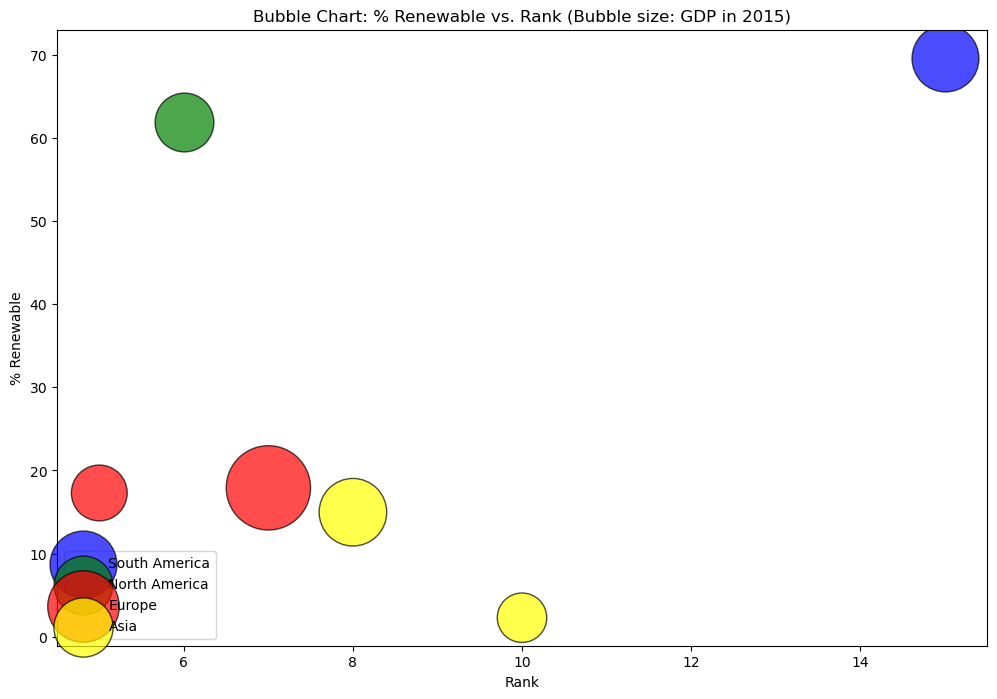

In [42]:
import matplotlib.pyplot as plt

def bubble_chart(df):
    plt.figure(figsize=(12, 8))
    for continent, color in zip(df['Continent'].unique(), ['blue', 'green', 'red', 'yellow', 'purple']):
        subset = df[df['Continent'] == continent]
        plt.scatter(subset['Rank'], subset['% Renewable'], s=subset['2015'] / 1e9,
                    color=color, alpha=0.7, edgecolors='black', label=continent)

    plt.title('Bubble Chart: % Renewable vs. Rank (Bubble size: GDP in 2015)')
    plt.xlabel('Rank')
    plt.ylabel('% Renewable')
    plt.legend()
    plt.show()

bubble_chart(result_df)
    